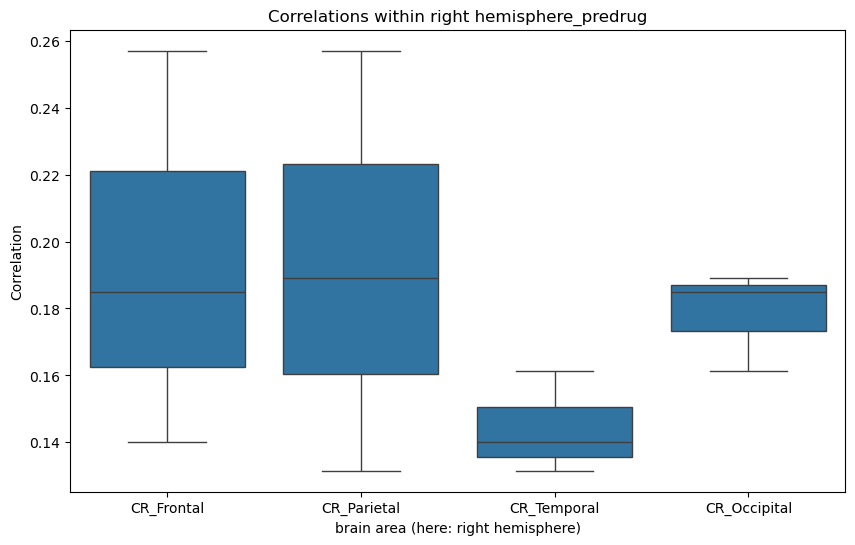

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_predrug = 'correlation_files/csv_tables/correlation_matrix_long_format_predrug.csv'
file_postdrug = 'correlation_files/csv_tables/correlation_matrix_long_format_postdrug.csv'

# Please insert which hemisphere you are analysing
hemisphere = 'right'

# Please insert which session you want to analyse
session = 'predrug'

if "predrug" in session: 
    # Load CSV file
    df = pd.read_csv(file_predrug)

    # Filter file with preconditions
    df_long_filtered_predrug = df[(df['Variable1'].str.startswith('CR_')) &
                                  (df['Variable2'].str.startswith('CR_')) &
                                  (df['Korrelation'] != 1)]

    # Generate violin diagram
    plt.figure(figsize=(10, 6))
    sns.boxplot(data= df_long_filtered_predrug, x= 'Variable1', y='Korrelation')

    # Further modifications on diagram
    plt.title(f'Correlations within {hemisphere} hemisphere_predrug')
    plt.xlabel(f'brain area (here: {hemisphere} hemisphere)')
    plt.ylabel('Correlation')
    plt.savefig(f"diagrams/boxplot/Correlation within {hemisphere} hemisphere_predrug", dpi=300, bbox_inches='tight')
    plt.show()

elif "postdrug" in session: 
    # Load CSV file
    df = pd.read_csv(file_postdrug)

    # Filter file with preconditions
    df_long_filtered_postdrug = df[(df['Variable1'].str.startswith('CR_')) &
                                   (df['Variable2'].str.startswith('CR_')) &
                                   (df['Korrelation'] != 1)]

    # Generate violin diagram
    plt.figure(figsize=(10, 6))
    sns.boxplot(data= df_long_filtered_postdrug, x= 'Variable1', y='Korrelation')

    # Further modifications on diagram
    plt.title(f'Correlations within {hemisphere} hemisphere_postdrug')
    plt.xlabel(f'brain area (here: {hemisphere} hemisphere)')
    plt.ylabel('Correlation')
    plt.savefig(f"diagrams/boxplot/Correlation within {hemisphere} hemisphere_postdrug", dpi=300, bbox_inches='tight')
    plt.show()
